<a href="https://colab.research.google.com/github/jessems/covid-data-analyses/blob/main/Swiss_Hospitalizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
# Libraries needed for the tutorial

import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt

In [113]:
# Downloading the csv file from your GitHub account

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Printing out the first 5 rows of the dataframe

print (df.head())

           iso_code  ... excess_mortality_cumulative_per_million
date                 ...                                        
2020-02-24      AFG  ...                                     NaN
2020-02-25      AFG  ...                                     NaN
2020-02-26      AFG  ...                                     NaN
2020-02-27      AFG  ...                                     NaN
2020-02-28      AFG  ...                                     NaN

[5 rows x 64 columns]


In [114]:
# Downloading the csv file from your GitHub account

url = "https://www.covid19.admin.ch/api/data/20211112-b5cqnmme/sources/COVID19HospCapacity_geoRegion.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df2 = pd.read_csv(io.StringIO(download.decode('utf-8')))

df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace=True)

# Printing out the first 5 rows of the dataframe

print (df2.head())

           geoRegion  ICU_AllPatients  ...                 type              version
date                                   ...                                          
2020-03-30        AG             38.0  ...  COVID19HospCapacity  2021-11-12_08-01-49
2020-03-30        AI              NaN  ...  COVID19HospCapacity  2021-11-12_08-01-49
2020-03-30        AR              1.0  ...  COVID19HospCapacity  2021-11-12_08-01-49
2020-03-30        BE             75.0  ...  COVID19HospCapacity  2021-11-12_08-01-49
2020-03-30        BL             20.0  ...  COVID19HospCapacity  2021-11-12_08-01-49

[5 rows x 43 columns]


In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31968 entries, 2020-03-30 to 2021-11-11
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   geoRegion                         31968 non-null  object 
 1   ICU_AllPatients                   29364 non-null  float64
 2   ICU_Covid19Patients               29364 non-null  float64
 3   ICU_Capacity                      29364 non-null  float64
 4   Total_AllPatients                 29364 non-null  float64
 5   Total_Covid19Patients             29364 non-null  float64
 6   Total_Capacity                    29364 non-null  float64
 7   ICU_NonCovid19Patients            29364 non-null  float64
 8   ICU_FreeCapacity                  29364 non-null  float64
 9   Total_NonCovid19Patients          29364 non-null  float64
 10  Total_FreeCapacity                29364 non-null  float64
 11  timeframe_14d                     31968 non-null  

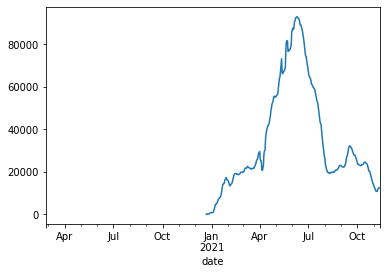

In [116]:
df[df['iso_code'] == 'CHE']['new_vaccinations_smoothed'].plot()

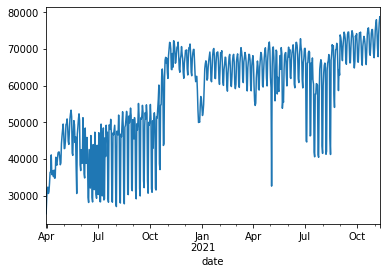

In [117]:
df2['Total_AllPatients'].groupby('date').sum().plot()

In [118]:
# plt.figure(figsize=(12, 6))
plot_df1 = df[df['iso_code'] == 'CHE']['new_vaccinations_smoothed']
plot_df2 = df2['Total_Covid19Patients_mean15d'].groupby('date').sum()
plot_df3 = df2['Total_NonCovid19Patients_mean15d'].groupby('date').sum()
plot_df2 = plot_df2.replace(0.0, np.nan)
plot_df3 = plot_df3.replace(0.0, np.nan)

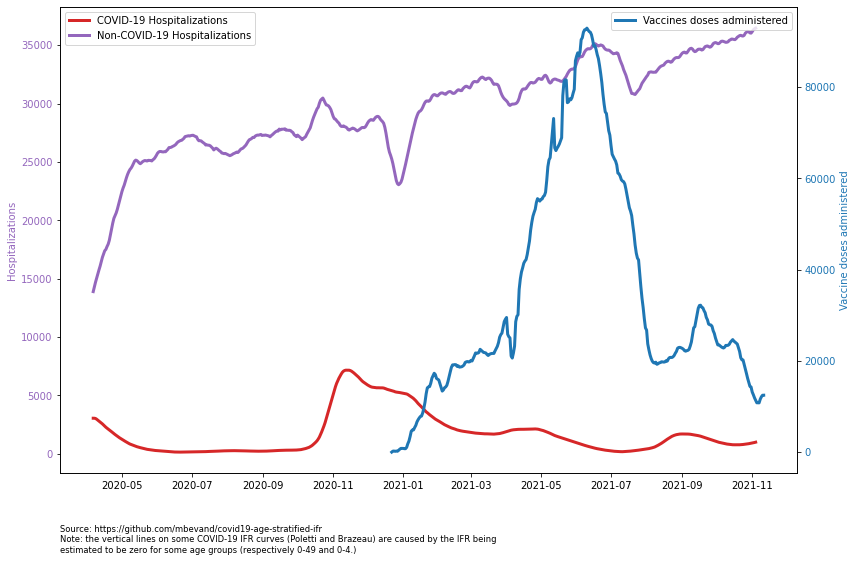

In [119]:

fig, ax1 = plt.subplots()

fig.set_size_inches(12, 8)

color = 'tab:red'
# ax1.set_xlabel('time (s)')
ax1.plot(plot_df2, color=color, linewidth=3)

color = 'tab:purple'
ax1.set_ylabel('Hospitalizations', color=color)
ax1.plot(plot_df3, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Vaccine doses administered', color=color)  # we already handled the x-label with ax1
ax2.plot(plot_df1, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(['COVID-19 Hospitalizations', 'Non-COVID-19 Hospitalizations'])
ax2.legend(['Vaccines doses administered'])

ax1.text(0, -0.11,
    'Source: https://github.com/mbevand/covid19-age-stratified-ifr\n'
    'Note: the vertical lines on some COVID-19 IFR curves (Poletti and Brazeau) are caused by the IFR being\n'
    'estimated to be zero for some age groups (respectively 0-49 and 0-4.)\n',
            transform=ax1.transAxes, fontsize='small', verticalalignment='top',
    )

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()